In [1]:
!pip install wordcloud
!pip install vaderSentiment
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df=pd.read_csv("X data.csv")
print(df.shape)
print(df.columns)

(162980, 2)
Index(['clean_text', 'category'], dtype='object')


In [3]:
print(df.head())
print(df.tail())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
                                               clean_text  category
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0


In [4]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
clean_text    4
category      7
dtype: int64


In [5]:
df.dropna(subset=['clean_text','category'],inplace=True)
print("Dataset shape:",df.shape)
print(df.isnull().sum())

Dataset shape: (162969, 2)
clean_text    0
category      0
dtype: int64


In [6]:
import re
def clean_tweet(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)# remove URLs
    text = re.sub(r"@\w+", "", text)# remove mentions
    text = re.sub(r"#", "", text)# remove hashtag sign
    text = re.sub(r"[^A-Za-z0-9\s]", "", text) # remove special characters
    return text.strip()

df['clean_text'].apply(clean_tweet)

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object

In [7]:
print(df['category'].unique())

[-1.  0.  1.]


In [8]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['clean_text'].apply(get_sentiment)

In [9]:
print(df)

                                               clean_text  category Sentiment
0       when modi promised “minimum government maximum...      -1.0  Positive
1       talk all the nonsense and continue all the dra...       0.0  Negative
2       what did just say vote for modi  welcome bjp t...       1.0  Positive
3       asking his supporters prefix chowkidar their n...       1.0  Negative
4       answer who among these the most powerful world...       1.0  Positive
...                                                   ...       ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0  Negative
162976  dear rss terrorist payal gawar what about modi...      -1.0  Negative
162977  did you cover her interaction forum where she ...       0.0   Neutral
162978  there big project came into india modi dream p...       0.0  Positive
162979  have you ever listen about like gurukul where ...       1.0  Negative

[162969 rows x 3 columns]


In [11]:
print(df.shape)
print(df.info())

(162969, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
 2   Sentiment   162969 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.0+ MB
None


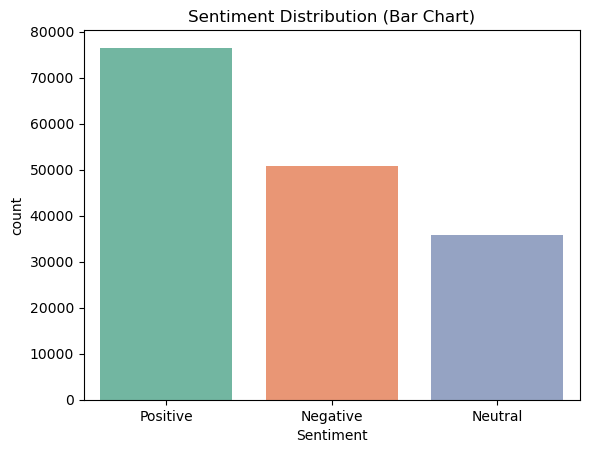

In [12]:
sns.countplot(x="Sentiment", hue="Sentiment", data=df, palette="Set2", legend=False)
plt.title("Sentiment Distribution (Bar Chart)")
plt.show()

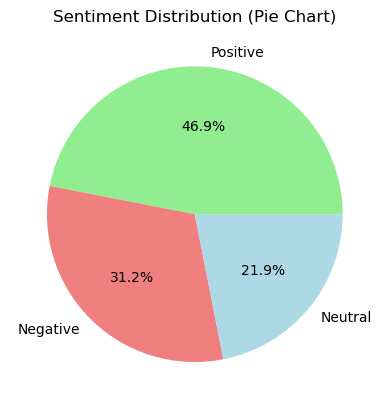

In [13]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','lightcoral','lightblue'])
plt.title("Sentiment Distribution (Pie Chart)")
plt.ylabel("")
plt.show()

In [15]:
from collections import Counter


def get_top_words(texts, n=10):  
    words = " ".join(texts).split()     
    return Counter(words).most_common(n) 


for sentiment in df["Sentiment"].unique():
    subset = df[df["Sentiment"] == sentiment]
    top_words = get_top_words(subset["clean_text"], 10)
    print(f"\nTop words in {sentiment} tweets:")
    print(top_words)



Top words in Positive tweets:
[('modi', 73277), ('the', 53251), ('and', 35603), ('for', 28149), ('you', 20839), ('will', 14998), ('india', 14795), ('this', 14463), ('that', 14149), ('not', 14019)]

Top words in Negative tweets:
[('modi', 48896), ('the', 36681), ('and', 23651), ('for', 16820), ('you', 13275), ('not', 11175), ('are', 10650), ('that', 10146), ('this', 10057), ('will', 9498)]

Top words in Neutral tweets:
[('modi', 30194), ('the', 14458), ('and', 8085), ('for', 7445), ('india', 4651), ('you', 4595), ('will', 4414), ('not', 4123), ('this', 4042), ('are', 3489)]


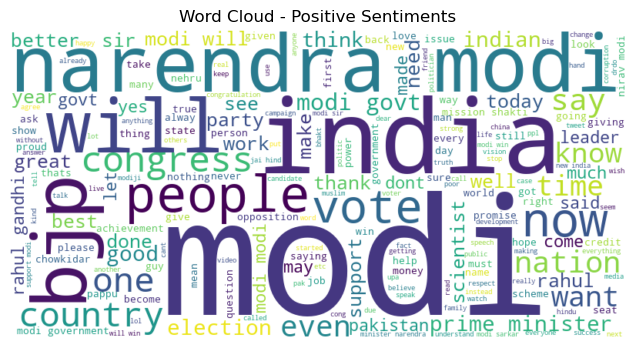

In [16]:
positive_words = " ".join(df[df['Sentiment']=='Positive']['clean_text'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Sentiments")
plt.show()

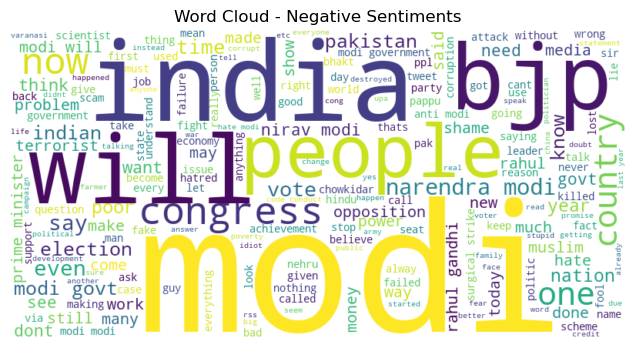

In [18]:
negative_words = " ".join(df[df['Sentiment']=='Negative']['clean_text'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Sentiments")
plt.show()

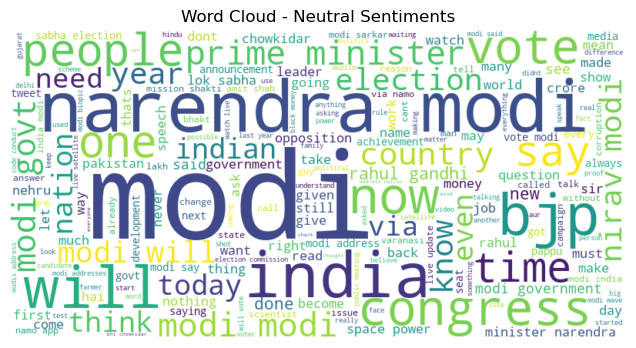

In [19]:
neutral_words = " ".join(df[df['Sentiment']=='Neutral']['clean_text'])
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_words)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Neutral Sentiments")
plt.show()

In [20]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    trend = df.groupby([df['date'].dt.date, 'Sentiment']).size().unstack().fillna(0)
    trend.plot(kind='line', figsize=(10,5))
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

In [22]:
df.to_csv("sentiment_results.csv", index=False)
print("Sentiment Analysis Completed! Results saved to sentiment_results.csv")

Sentiment Analysis Completed! Results saved to sentiment_results.csv
